## Machine Learning Model for breast illnes prediction

In [1]:
# Imports de paqotes necessários
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from pickle import load
import pickle

## Carga do Dataset
A dataset trata de informacoes clinicas de consultas clinicas de mulheres que foram fazer teste de cancer da mama. Os dados usados estao disponiveis no https://www.kaggle.com/datasets/nancyalaswad90/breast-cancer-dataset, conta com 569 casos e 11 campos, o output da saida é (y=1 ou 0), onde 1 é diagnostico maligno y 0 um diagnostico benigno.


In [2]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/SuEmmax/Datasets/refs/heads/main/Breast%20data.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=';')

# Mostra as primeiras linhas do dataset
dataset.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1


## Separação em conjunto de treino e conjunto de teste com holdout
Nessa parte dividimos a dataset em 80% pra treinar e 20% restante pra fazer a validacao do teste mediante o indicador 'accuracy'.

In [3]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:10]
y = array[:,10]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação


# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

Nessa parte vamos testar 4 algoritmos de ML pra clasificar os dados, esses algoritmos serao avaliados pelo indicador 'accuracy', os algoritmos sao:


*  KNeighborsClassifier
*  DecisionTreeClassifier
*   GaussianNB
*   SVC





KNN: 0.888213 (0.051378)
CART: 0.938551 (0.034801)
NB: 0.918744 (0.033889)
SVM: 0.888019 (0.029687)


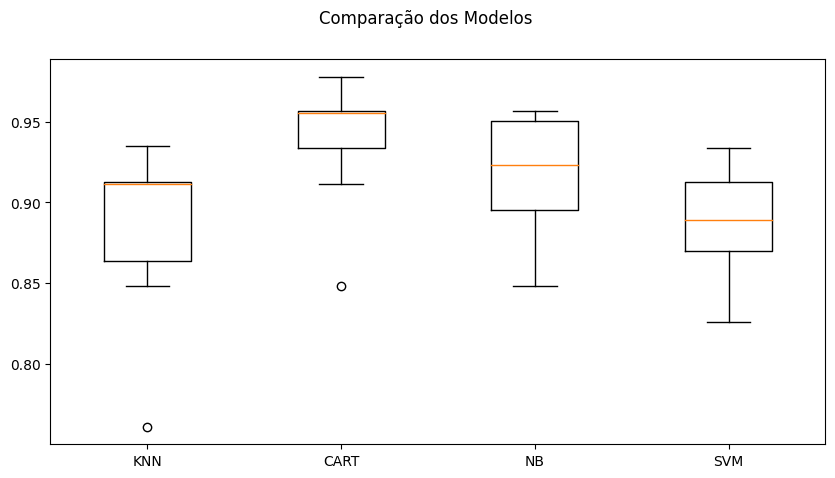

In [4]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(10,5))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


## Avaliacao do modelo normalizando e padronizando
Depois do analisis da Boxplot, o modelo DecisionTreeClassifier 'CART' tem um bom performance com o indice accuracy, mas agora vai se testar os 4 algoritmos com dados normalizados e padronizados pra seguir analizando o indicador.

KNN-orig: 0.888 (0.051)
CART-orig: 0.939 (0.035)
NB-orig: 0.919 (0.034)
SVM-orig: 0.888 (0.030)
KNN-padr: 0.943 (0.040)
CART-padr: 0.923 (0.033)
NB-padr: 0.919 (0.032)
SVM-padr: 0.950 (0.034)
KNN-norm: 0.950 (0.036)
CART-norm: 0.932 (0.031)
NB-norm: 0.919 (0.032)
SVM-norm: 0.950 (0.035)


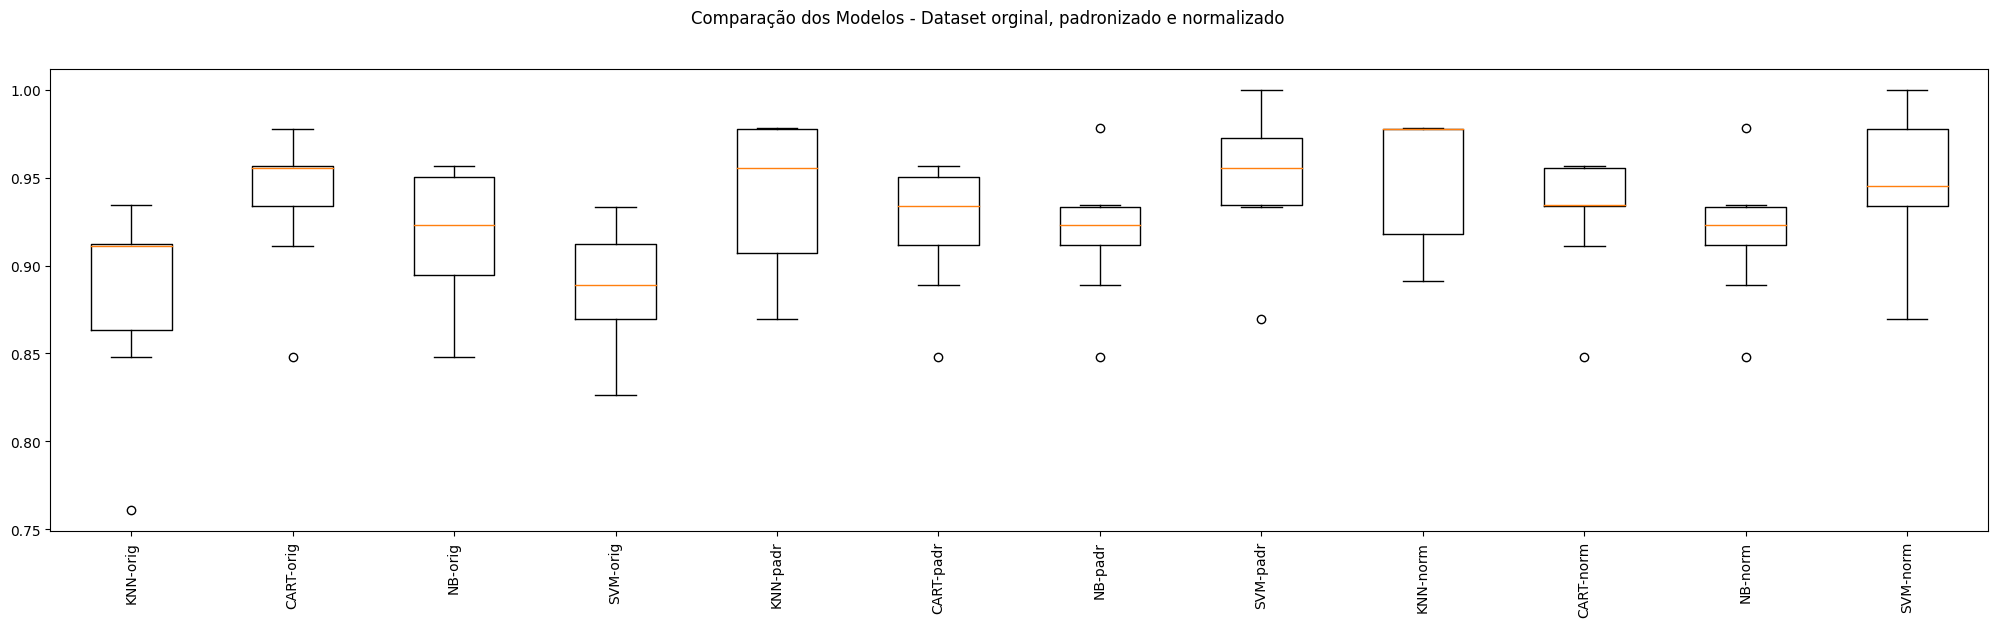

In [5]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros
A avaliacao com dataset padronizados e normalizados mudaram o modelo para dois candidatos: KNN-norm e SVM-norm, essa avaliacao é baseado na accuracy e pra elegir o modelo a usar olhamos o boxplot onde o modelo KNN-norm tem melhor distribuicao de dados.

Agora faremos o tunning do modelo KNN pelo hiperparametros; neighbors e metrics:

In [6]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],

}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.898986 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 9}
Sem tratamento de missings: knn-padr - Melhor: 0.949614 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 17}
Sem tratamento de missings: knn-norm - Melhor: 0.949662 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 5}


## Finalização do Modelo
Os resultados da otimizacao de hiperparâmetros mostraram que o melhor modelo foi o K Nearest Neighbor (KNN) com dados normalizados, com os seguintes parametros:


*   metric: euclidean
*   neighbors: 5


Finalmente criaremos o normalizador e o modelo final com estes parâmetros

In [7]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(metric='euclidean', n_neighbors=5)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.9210526315789473


In [8]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

KNeighborsClassifier(metric='euclidean')

## Simulando a aplicação do modelo em dados não vistos

In [9]:
# Novos dados - não sabemos a classe!
data = {'radius':  [7, 20, 35],
        'texture':  [10, 25, 20],
        'perimeter': [110, 100, 145],
        'area': [734, 110, 1200],
        'smothness': [0.01, 0.42, 0.087],
        'compactness': [0.023, 0.198, 0.0250],
        'concavity': [0.12, 0.02, 1.0],
        'concave': [0.009, 0.012, 0.187],
        'symmetry': [0.23, 0.123 , 0.435],
        'fractal': [0.065, 0.0232 , 0.0435],
        }

atributos = ['radius','texture', 'perimeter', 'area', 'smothness', 'compactness', 'concavity', 'concave', 'symmetry','fractal']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:10].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)


[[-2.02425203 -2.16176357  0.74269913  0.22499951 -6.14586758 -1.54153199
   0.39172369 -1.02967374  1.78305274  0.31221172]
 [ 1.66793252  1.32883712  0.33079712 -1.54972052 23.03196362  1.77497691
  -0.86377342 -0.9522918  -2.12345669 -5.61337324]
 [ 5.92814546  0.16530356  2.18435613  1.55035132 -0.66612855 -1.50362903
  11.44009826  3.56165511  9.26748671 -2.735637  ]]


In [10]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[0. 0. 1.]


In [11]:
from pickle import load
import pickle
filename = 'scalerML.pkl'
pickle.dump(scaler, open(filename, 'wb'))

filename = 'modeloML.pkl'
pickle.dump(model, open(filename, 'wb'))

